# 1.1 Quickstart

As a simple first example, we will use $\texttt{eleanor}$ to create a target pixel file (TPF) and light curve for a given TIC target.

In [1]:
from IPython.display import Image

In [2]:
import eleanor as ellie
import numpy as np
import matplotlib.pyplot as plt

First, we will load the data for TIC 198591153, a relatively bright star (TESS mag = 9.0) observe in Sector 1. $\texttt{eleanor}$ is able to extract a light curve easily and automatically for this unblended object. Calling source will assign a $\textit{Gaia}$ ID, TESS magnitude, sector, camera, ccd, and associated postcard.

In [3]:
ellie.Source(fn='/Users/AdinaFeinstein/Documents/UChicago/og_ELLIE/ellie/hlsp_eleanor_tess_ffi_lc_TIC29415278_s1_v0.1.fits')

In [4]:
dp = ellie.Source(coords=[239.852518, 40.150454])

Now that we have our Source information, we simply called the individual_tpf() function, which will extract a target pixel file, perform aperture photometry with an automatically optimized aperture choice, and complete some simple systematics corrections.

In [5]:
target = ellie.TargetData(dp)
target.save()

Don't be afraid of this download. We have created an intermediate step between FFIs and TPFs called $\textbf{postcards}$. In order to create a TPF, $\texttt{eleanor}$ downloads the postcard your source falls on.

# 1.2 Custom Apertures

That was easy! But what if you're not satisfied with $\texttt{eleanor}$'s default choice of aperture? Well, we provide you with two ways to create your own aperture.

(1) $\texttt{eleanor}$ can help you create your own mask. By calling custom_aperture, you can choose from a circular or rectangular aperture. You can also choose the size (radius or length x width) and the pixel the aperture is centered on. The aperture will only be created on pixels within the TPF (it won't spill over to other pixels)

In [6]:
ellie.TargetData.custom_aperture(target, 9, 9, shape='circle', r=1)
ellie.TargetData.get_lightcurve(target)

(2) You can pass in your own mask. Create a 2D array of the same shape as your TPF and pass in the aperture using the following command

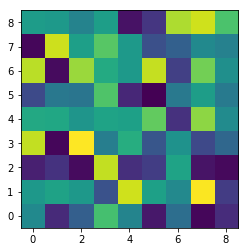

In [7]:
mask = np.random.uniform(size=np.shape(target.tpf[0]))
plt.imshow(mask, origin='lower')
target.get_lightcurve(custom_mask=mask)

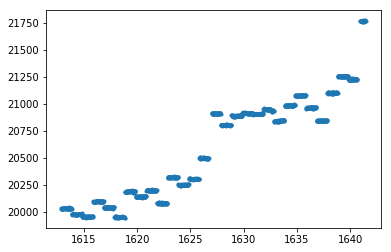

In [8]:
plt.plot(target.time, target.raw_flux, '.')

# 1.2.1 Ultra-Custom Apertures: Click the pixels you want!

We have created a user-friendly method to create your own aperture by selecting the pixels you wish to be included in the photometry. Here's how you would go about doing so:

In [9]:
Image(url='customApExample.gif')

Look! We found a hot Jupiter! (Totally unplanned...)

Currently, this feature only works when called from the terminal. We are working towards creating an option to embed this feature in a Jupyter Notebook... So stay tuned!

# 1.3 Systematics Corrections

When we called ellie.TargetData(dp) in 1.1, some simple systematics corrections were automatically performed on the light curve. Let's apply those explicitly to the newly created raw light curve from the custom aperture.

In [10]:
ellie.TargetData.rotation_corr(target)

# 1.4 $\texttt{eleanor}$ + $\textit{Gaia}$ == Good Times

We've created this neat hover tool to help you work with $\textit{Gaia}$ and $\textit{TESS}$ together! Let's explore how it works

In [11]:
vis = ellie.Visualize(target)

In [12]:
vis.mark_gaia_sources()

29415278
29415283
29415278
29415283
29415283
29415283
29415283
29415283
